In [10]:
import pandas as pd
import numpy as np

# Load the new, pre-cleaned CSV file
# If the file is in a 'data' subfolder
df = pd.read_csv('/Users/mith/Desktop/Heart_disease/HDA/data/heart.csv')

# Display the first 5 rows to confirm it loaded correctly
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


target
1    526
0    499
Name: count, dtype: int64


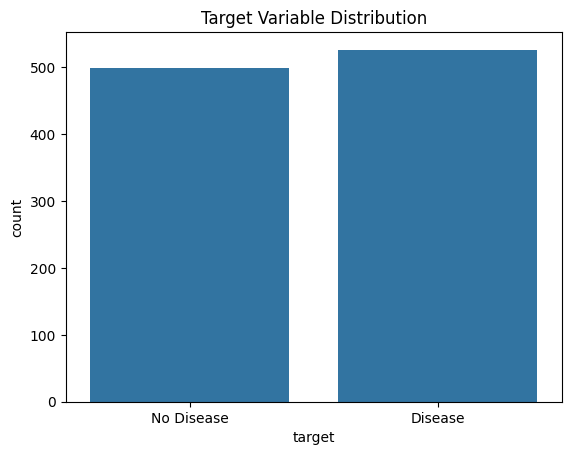

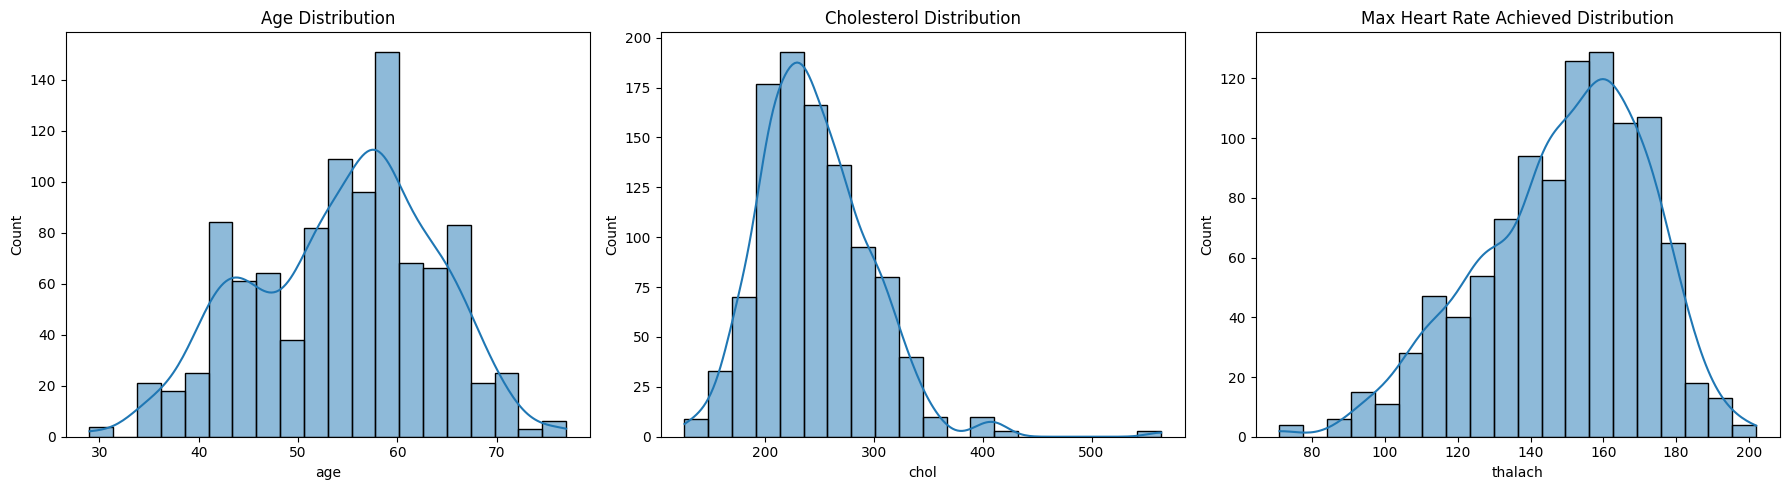

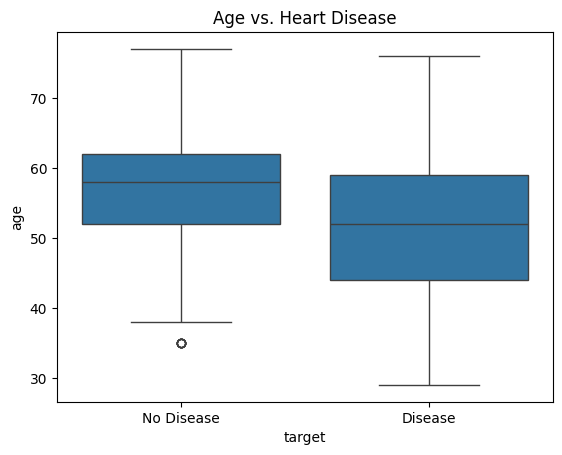

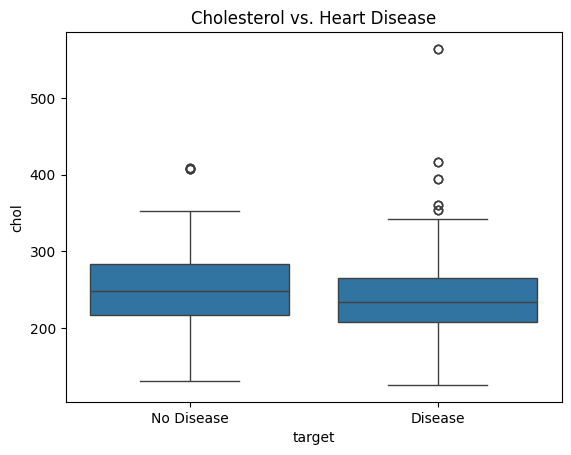

In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new, pre-cleaned CSV file
# If the file is in a 'data' subfolder
df = pd.read_csv('/Users/mith/Desktop/Heart_disease/HDA/data/heart.csv')

# Display the first 5 rows to confirm it loaded correctly
df.head()
# Check the distribution of the target variable
print(df['target'].value_counts())
# Visualize the target variable distribution
sns.countplot(x='target', data=df)
plt.title('Target Variable Distribution')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()
# Histograms for key numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['age'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(df['chol'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Cholesterol Distribution')

sns.histplot(df['thalach'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Max Heart Rate Achieved Distribution')

plt.tight_layout()
plt.show()
# Box plot for Age vs. Target
sns.boxplot(x='target', y='age', data=df)
plt.title('Age vs. Heart Disease')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

# Box plot for Cholesterol vs. Target
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol vs. Heart Disease')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

/var/folders/1d/cgk_glnd7gbb14lckvmlqmv00000gn/T/ipykernel_1668/2264091510.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Female', 'Male'])
/var/folders/1d/cgk_glnd7gbb14lckvmlqmv00000gn/T/ipykernel_1668/2264091510.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
/var/folders/1d/cgk_glnd7gbb14lckvmlqmv00000gn/T/ipykernel_1668/2264091510.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(['False', 'True'])
/var/folders/1d/cgk_glnd7gbb14lckvmlqmv00000gn/T/ipykernel_1668/2264091510.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. af

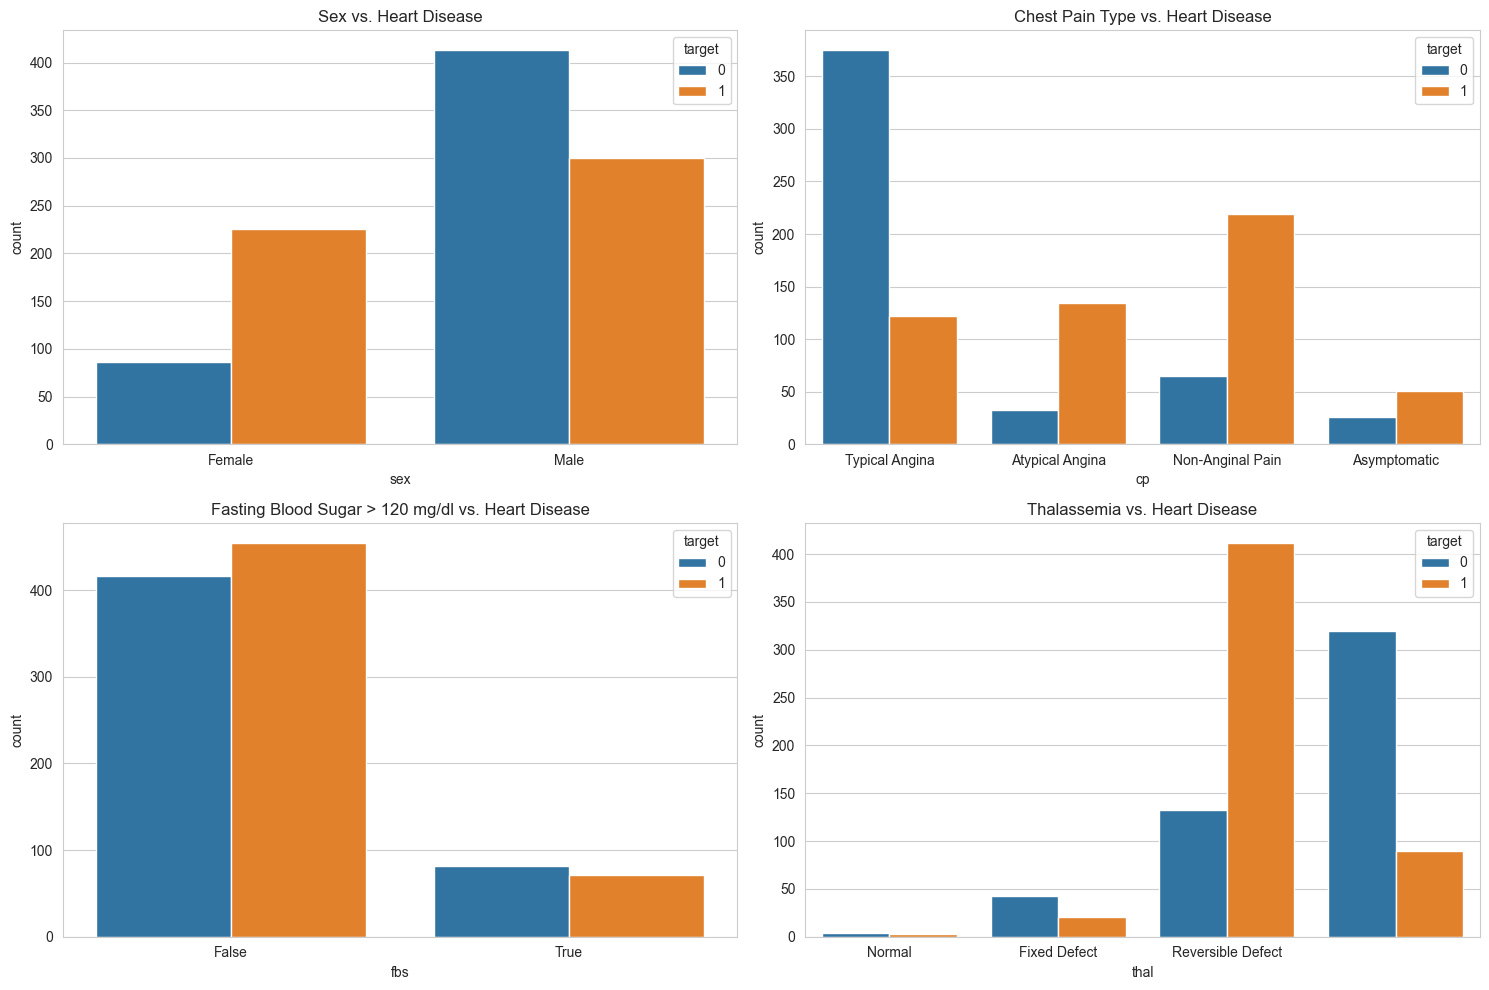

In [16]:
import pandas as pd
import os               
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
# Set the plot style
sns.set_style('whitegrid')

# Create subplots for different categorical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sex vs. Target
sns.countplot(x='sex', hue='target', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Sex vs. Heart Disease')
axes[0, 0].set_xticklabels(['Female', 'Male'])

# Chest Pain Type (cp) vs. Target
sns.countplot(x='cp', hue='target', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Chest Pain Type vs. Heart Disease')
axes[0, 1].set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])

# Fasting Blood Sugar (fbs) vs. Target
sns.countplot(x='fbs', hue='target', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Fasting Blood Sugar > 120 mg/dl vs. Heart Disease')
axes[1, 0].set_xticklabels(['False', 'True'])

# Thalassemia (thal) vs. Target
sns.countplot(x='thal', hue='target', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Thalassemia vs. Heart Disease')
axes[1, 1].set_xticklabels(['Normal', 'Fixed Defect', 'Reversible Defect'])

plt.tight_layout()
plt.show()

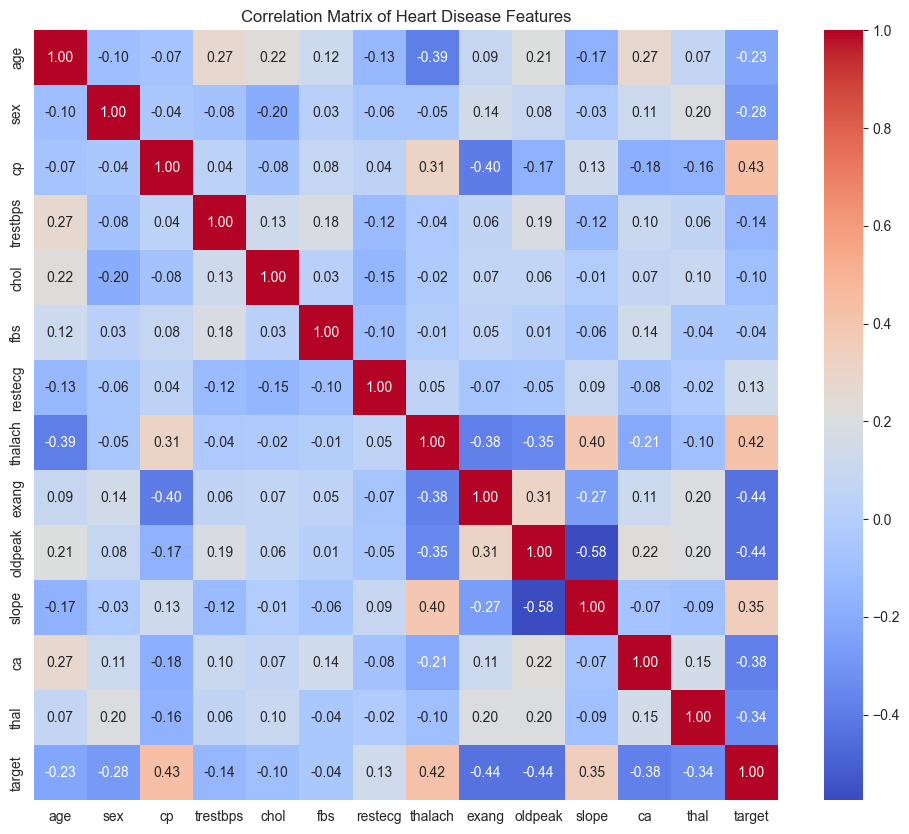

In [18]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Heart Disease Features')
plt.show()



In [19]:
# Convert numerical columns that represent categories
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_features:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1025 non-null   int64   
 1   sex       1025 non-null   category
 2   cp        1025 non-null   category
 3   trestbps  1025 non-null   int64   
 4   chol      1025 non-null   int64   
 5   fbs       1025 non-null   category
 6   restecg   1025 non-null   category
 7   thalach   1025 non-null   int64   
 8   exang     1025 non-null   category
 9   oldpeak   1025 non-null   float64 
 10  slope     1025 non-null   category
 11  ca        1025 non-null   category
 12  thal      1025 non-null   category
 13  target    1025 non-null   int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 57.4 KB


In [20]:
# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']


In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the new datasets to confirm the split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

ModuleNotFoundError: No module named 'sklearn'